# PyTurbo_Aero 3D Design Tutorial
In this tutorial you will learn how to construct a 3D Blade by stacking 2D designs on top of each other using a stacking line defined at the leading edge, centroid or trailing edge. Lets begin!


## Installing PyTurbo-Aero
Run the code below to pip install the latest version of pyturbo-aero

In [1]:
!pip install pyturbo-aero

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.6 MB/s eta 0:00:00


## Design our 2D Blade Profiles
To construct the 3D blade we build two or more key 2D Blade profiles then stack them according to the leading edge, trailing edge, or centroid.

## Building the Hub Profile
This is the 2D blade shape located at the lowest possible radius in the turbo machine.

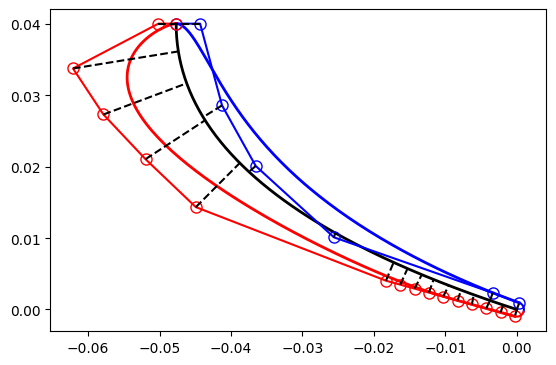

In [ ]:
import numpy as np
from pyturbo.aero import Airfoil2D
from pyturbo.helper import exp_ratio

stator_hub = Airfoil2D(alpha1=0,alpha2=72,axial_chord=0.04,stagger=50) # This creates the camberline
# Building Leading Edge
stator_hub.add_le_thickness(0.04)
# Building the Pressure side
ps_height = [0.0500,0.0200,-0.0100] # These are thicknesses
stator_hub.add_ps_thickness(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.2400, 0.2000, 0.1600, 0.1400]
stator_hub.add_ss_thickness(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)
stator_hub.match_thickness(location='LE')
stator_hub.te_create(radius=0.001,wedge_ss=2.5,wedge_ps=2.4)

stator_hub.add_ss_flow_guidance_2(0.8,10)
stator_hub.plot2D()

## Building the Mid Profile
This is the 2D blade shape located in the middle of the blade

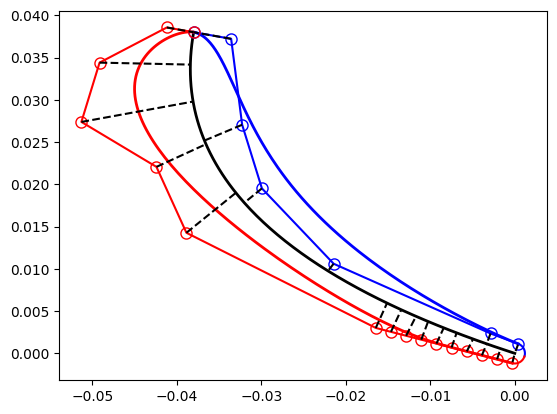

In [ ]:
stator_mid = Airfoil2D(alpha1=10,alpha2=72,axial_chord=0.038,stagger=45) # This creates the camberline
# Building Leading Edge
stator_mid.add_le_thickness(0.06)
# Building the Pressure side
ps_height = [0.0900,0.0500,0.0200] # These are thicknesses normalized by the chord
stator_mid.add_ps_thickness(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.200, 0.2500, 0.1200, 0.1400]
stator_mid.add_ss_thickness(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)
stator_mid.match_thickness(location='LE')
stator_mid.te_create(radius=0.0012,wedge_ss=3.5,wedge_ps=2.4)

stator_mid.add_ss_flow_guidance_2(0.8,10)
stator_mid.plot2D()

## Building the Tip Profile
This is the 2D blade shape located in the top of the blade (highest radius)

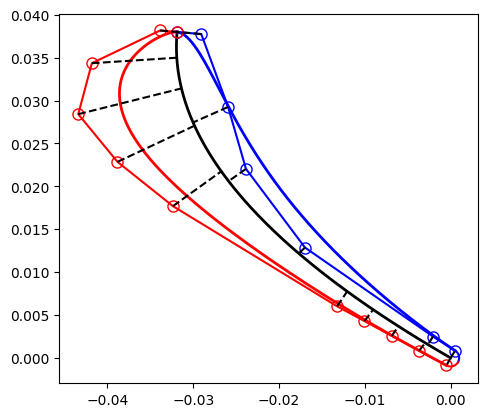

In [ ]:
stator_tip = Airfoil2D(alpha1=5,alpha2=60,axial_chord=0.038,stagger=40) # This creates the camberline
# Building Leading Edge
stator_tip.add_le_thickness(0.04)
# Building the Pressure side
ps_height = [0.0900,0.0500,0.0200] # These are thicknesses normalized by the chord
stator_tip.add_ps_thickness(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.200, 0.2500, 0.2000, 0.1400]
stator_tip.add_ss_thickness(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)
stator_tip.match_thickness(location='LE')
stator_tip.te_create(radius=0.001,wedge_ss=1.5,wedge_ps=2.4)

stator_tip.add_ss_flow_guidance_2(s_c=0.8,n=10) # s_c is the pitch to chord ratio, you have to pick this. For stators 0.8 to 0.9 is fine.
stator_tip.plot2D()

# Constructing the 3D Blade
Now that we have the 3 profiles, we are ready to build the full 3D Geometry

## Stacking the Geometry
The first step to being able to stack the profiles is to define an `airfoil3D` object. This class handles the stacking and manipulation of `airfoil2D` objects.

Arguments for airfoil3D
>Args:
>    profileArray (List[airfoil2D]): array of airfoil2D profiles
>    profile_loc (List[float]): location of the airfoil2D profiles as percentage along the height
>    height (float): height of the 3D blade normalized by the hub chord

Stacking is done in 3 ways: Leading Edge, centroid, or trailing edge.


/Users/pjuangph/Documents/GitHub/pyturbo-aero/pyturbo/helper/bezier.py:358: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  temp = minimize_scalar(f2,bounds=(t_start,t_end),method="bounded",tol=1e-6,args=(t_start))
Equal Spacing: 100%|██████████| 20/20 [00:03<00:00,  5.84it/s]


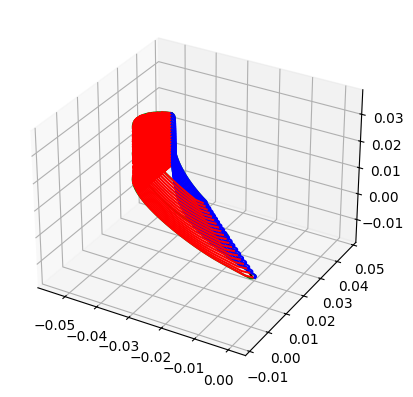

In [4]:
from pyturbo.aero import Airfoil3D
from pyturbo.helper import StackType
import matplotlib.pyplot as plt

stator3D = Airfoil3D(profileArray=[stator_hub,stator_mid,stator_tip],profile_loc=[0.0,0.5,1.0], height = 0.02)
stator3D.stack(StackType.leading_edge) # Stators are typically stacked with leading edge; rotors with centroid or trailing edge
# You can also use stack_type.centroid or stack_type.trailing_edge
stator3D.build(nProfiles=20,num_points=160,trailing_edge_points=20)
# stator3D.center_le() # Centers the leading edge at (0,0); use this only if you are simulating a single blade. Makes creating planes for data extraction easier.
stator3D.plot3D()

# You can use any of these export functions to create a custom export function for your application
stator3D.export_stl()
stator3D.export_solidworks("solidwork_curves.txt")

Equal Spacing: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


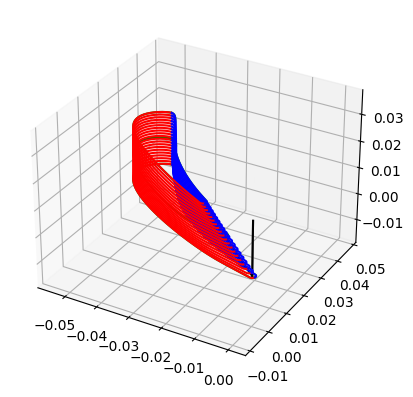

In [ ]:
stator3D = Airfoil3D(profileArray=[stator_hub,stator_mid,stator_tip],profile_loc=[0.0,0.5,1.0], height = 0.02)
stator3D.stack(StackType.trailing_edge) # Stators are typically stacked with leading edge; rotors with centroid or trailing edge
# You can also use stack_type.centroid or stack_type.trailing_edge
stator3D.build(20,160,20)
# stator3D.center_le() # Centers the leading edge at (0,0); use this only if you are simulating a single blade. Makes creating planes for data extraction easier.
stator3D.plot3D()

/usr/local/lib/python3.10/dist-packages/pyturbo/helper/bezier.py:74: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  temp = minimize_scalar(f2,bounds=(t_start,t_end),method="bounded",tol=1e-6,args=(t_start))
Equal Spacing: 100%|██████████| 20/20 [00:09<00:00,  2.21it/s]


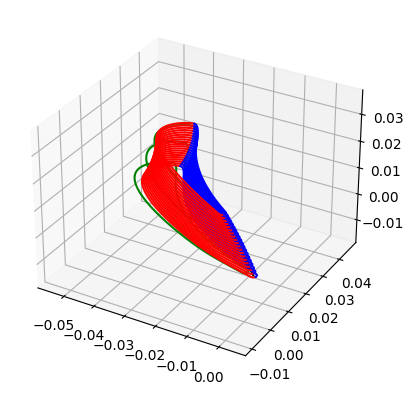

In [ ]:
stator3D = Airfoil3D(profileArray=[stator_hub,stator_mid,stator_tip],profile_loc=[0.0,0.5,1.0], height = 0.02)
stator3D.stack(StackType.centroid) # Stators are typically stacked with leading edge; rotors with centroid or trailing edge
# You can also use stack_type.centroid or stack_type.trailing_edge
stator3D.build(20,160,20)
# stator3D.center_le() # Centers the leading edge at (0,0); use this only if you are simulating a single blade. Makes creating planes for data extraction easier.
stator3D.plot3D()
# rotate the axes and update



## Adding Lean and Sweep
Lean and Sweep can be added by calling `lean_add` and `sweep`. Both lean and sweep are defined using bezier curve control points.

> Note: You can change the twist by messing with the stagger angle of the 2D Designs

> Another Note: The green profiles that you see are the control profiles that you specified at the hub, mid, and tip. These may not move with the design after you apply lean and sweep.

You can use lean and sweep with each other.

Equal Spacing: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]


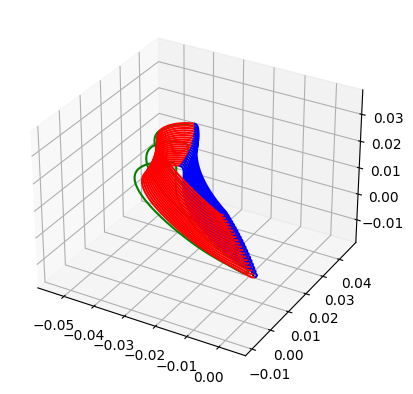

In [ ]:
stator3D = Airfoil3D(profileArray=[stator_hub,stator_mid,stator_tip],profile_loc=[0.0,0.5,1.0], height = 0.02)
stator3D.stack(stackType=StackType.centroid)
stator3D.add_lean(leanX=[0,0.03,0.01], leanZ=[0.0, 0.5, 1]) # Z =1 is blade tip, Z = 0 is blade hub. The units are in percentage
stator3D.build(20,160,20)
stator3D.plot3D()



/usr/local/lib/python3.10/dist-packages/pyturbo/helper/bezier.py:74: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  temp = minimize_scalar(f2,bounds=(t_start,t_end),method="bounded",tol=1e-6,args=(t_start))
Equal Spacing: 100%|██████████| 20/20 [00:07<00:00,  2.69it/s]


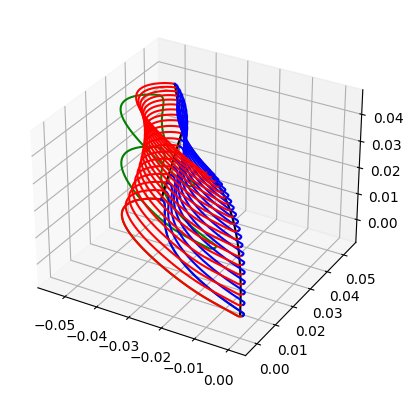

In [ ]:
stator3D = Airfoil3D(profileArray=[stator_hub,stator_mid,stator_tip],profile_loc=[0.0,0.5,1.0], height = 0.04)
stator3D.stack(StackType.leading_edge) # Stators are typically stacked with leading edge; rotors with centroid or trailing edge
stator3D.add_sweep(sweep_y=[0,0.5,0.2], sweep_z=[0.0, 0.5, 1]) # Z =1 is blade tip, Z = 0 is blade hub. The units are in percentage
stator3D.build(20,160,20)
stator3D.plot3D()

## Flipping and Rotating the Geometry
When are done creating the design in 3D, if you ever need to export the geometry to a mesher there can be some subtleties to work out such as the orientation of the geometry. For that reason, I've included some code to rotate the completed design. The code below shows how you can re-orient your design.

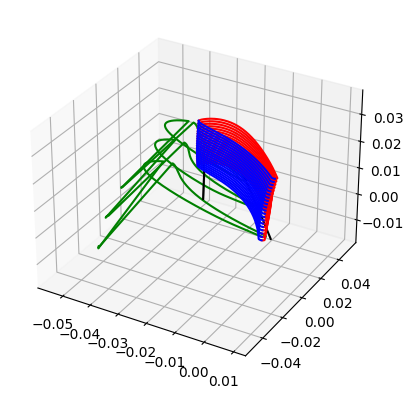

In [ ]:
stator3D.flip_y()
stator3D.rotate(cx=0,cy=0,angle=90)
stator3D.plot3D()

# Exporting to Solidworks
This will create a folder called "solidworks" and write text files containing blade section points

In [13]:
stator3D.export_solidworks('stator')

### Solidworks Macro
Solidworks macro code to import the designs. Save the following code block to a .swp or .swb file to be import into solidworks. The way Visual basic works inside of solidworks is the sub is run and that calls the supporting functions namely the "ReadTextFile"

```vb
    Dim swApp As Object

    Dim Part As Object
    Dim boolstatus As Boolean
    Dim longstatus As Long, longwarnings As Long
    Public Function ReadTextFile(ByVal filename As String, ByRef Part, ByRef x1 As Double, ByRef y1 As Double, ByRef z1 As Double)
    Dim x As Double
    Dim y As Double
    Dim z As Double
    Dim LoadFile As String
    Dim lines() As String
    Dim lineContents() As String
    Dim skPoint As Object

    ' Read the file
    ff = FreeFile
    Open filename For Binary As #ff
        LoadFile = Space(LOF(ff))
        Get #ff, , LoadFile
    Close #ff

    ' Read the lines of the file
    lines = Split(LoadFile, vbNewLine)
    Part.InsertCurveFileBegin
    For i = 0 To UBound(lines) - 1
        lineContents = Split(lines(i), " ")
        x = CDbl(lineContents(0)) / 1000 ' meters
        y = CDbl(lineContents(1)) / 1000
        z = CDbl(lineContents(2)) / 1000
        Call Part.InsertCurveFilePoint(x, y, z)
        If (i = 0) Then
            x1 = x
            y1 = y
            z1 = z
        End If
    Next i
    Call Part.InsertCurveFileEnd

    End Function



    Public Function ImportBlade(ByVal folder As String) As Integer
    Dim curveCount, i As Integer
    Dim x(1000) As Double
    Dim y(1000) As Double
    Dim z(1000) As Double
    curveCount = 0
    i = 1
    sFilename = Dir(folder & "\blade_*", vbDirectory)

    Do While sFilename <> ""
        If filename <> "." And filename <> ".." Then
            Debug.Print sFilename
            Call ReadTextFile(folder & "\" & sFilename, Part, x(i), y(i), z(i))
            curveCount = curveCount + 1
            i = i + 1
        End If
        sFilename = Dir()
    Loop

    Part.ClearSelection2 True

    Set swFeatMgr = Part.FeatureManager
    For i = 1 To curveCount
        ' make sure we select the first point
        boolstatus = Part.Extension.SelectByID2("Curve" & i, "REFERENCECURVES", x(i), y(i), z(i), True, 1, Nothing, 0)
        Set swSelMgr = Part.SelectionManager
        Set selObj = swSelMgr.GetSelectedObject6(1, 257)
        Set swFeat = swFeatMgr.InsertFillSurface2(2, swOptimizeSurface, selObj, swContact, Nothing, Nothing)
        Part.ClearSelection2 True
    Next i

    For i = 1 To curveCount
        ' make sure we select the first point
        boolstatus = Part.Extension.SelectByID2("Surface-Fill" & i, "SURFACEBODY", x(i), y(i), z(i), True, 0, Nothing, 0)
    Next i

    'boolstatus = Part.Extension.SelectByID2("Curve" & curveCount, "REFERENCECURVES", x(i - 1), y(i - 1), z(i - 1), True, 1, Nothing, 0)
    Call Part.FeatureManager.InsertProtrusionBlend(False, True, False, 1, 6, 6, 1, 1, True, True, False, 0, 0, 0, True, True, True)
    Part.ClearSelection2 True

    For i = 1 To curveCount
        ' make sure we select the first point
        boolstatus = Part.Extension.SelectByID2("Surface-Fill" & i, "SURFACEBODY", x(i), y(i), z(i), True, 0, Nothing, 0)
        Part.FeatureManager.HideBodies
        Part.ClearSelection2 True
    Next i

    ImportBlade = curveCount + 1
    End Function

    Public Function ImportCurves(ByVal folder As String) As Integer
    Dim myRegExp As RegExp
    Dim myMatches As MatchCollection
    Dim myMatch As Match
    Set myRegExp = New RegExp

    Dim currentFile As String
    Dim curve1, i, j As Integer
    Dim x(10000) As Double
    Dim y(10000) As Double
    Dim z(10000) As Double
    Dim Guide(1000) As Integer
    Dim nonGuide(20) As Integer
    Dim nonGuideCount As Integer
    Dim guideCount As Integer

    curve1 = curveCount
    i = 0
    myRegExp.IgnoreCase = True
    myRegExp.Global = True
    myRegExp.Pattern = "-(.*)_"

    'sFilename = Dir(folder & "\branch_" & branchName & "_*", vbDirectory)
    sFilename = Dir(folder & "\branch_*", vbDirectory)
    currentFile = ""
    Do While sFilename <> ""
        If sFilename <> "." And sFilename <> ".." Then
            Debug.Print sFilename
            Call ReadTextFile(folder & "\" & sFilename, Part, x(i), y(i), z(i))
        End If
        sFilename = Dir()
    Loop

    ImportCurves = curveCount

    End Function

    Sub main()

    Set swApp = Application.SldWorks
    Set Part = swApp.ActiveDoc
    Dim curveCount As Integer

    swApp.ActiveDoc.ActiveView.FrameState = 1

    Dim sFolder As String  ' path to folder where cross sections are stored



    ' Importing Tree Structures
    sFolder = "C:\SomeFolderContainingAllTheTextFiles"

    curveCount = ImportBlade(sFolder)

    End Sub
```

